<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M1_Linear_Algebra_Matrices_V7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2: Matrices

*Estimated timing to here from start of tutorial: 90 min*


In [1]:
# @title Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

# Section 1 Intro to matrices

A matrix is a "table" of numbers, ordered in rows and columns. As vectors, matrices are data structures allowing you to organize numbers. They are the  arrays containing values organized in two dimensions: rows and columns. We can think of them as a spreadsheet. Usually, we see the term matrix in the context of math and two-dimensional array as DataFrame in the context of Numpy.

***Rows and Columns***

To show how many rows and columns a matrix has we often write rows×columns.

<!-- ![](https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/images/Matrix_row_column.png) -->

Example: This matrix is $2*3$ (2 rows by 3 columns):

\begin{bmatrix}
6 & 4 & 24\\
1 & -9 & 8
\end{bmatrix}

You can write the matrix components as follows:

$$
\mathbf{A} = 
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
$$

Here are 7 aspects of Matrices that we will focus on in this tutorial:

- **Addition**

- **Scalar Multiplication**

- **Transposition**

- **Matrix Product**

- **Inverse of a Matrix**

- **Matrix Determinant**

- **Eigenvalues and Eigenvectors**

## Section 1.1 Dimension Term in Python and Linear Algebra:
- Dimensions of data structure: for example 0-D as Scalar, 1-D as array, 2-D Matrix, and n-d as Tensor

- Dimentions of geometric representation of vectors: for example 1-D as a vector with one element, 2-D with two elements (or components), etc.


## Section 1.2 Matrices in Data Science projects

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/CarPrice_Assignment.csv')
df = df[['car_ID', 'CarName', 'carlength', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'price']]
df.head()

car_ID                   CarName  carlength  enginesize  horsepower  \
0       1        alfa-romero giulia      168.8         130         111   
1       2       alfa-romero stelvio      168.8         130         111   
2       3  alfa-romero Quadrifoglio      171.2         152         154   
3       4               audi 100 ls      176.6         109         102   
4       5                audi 100ls      176.6         136         115   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

In [ ]:
car_1 = df.iloc[:, 2:4].to_numpy()[5]
car_2 = df.iloc[:, 2:4].to_numpy()[6]
car_3 = df.iloc[:, 2:4].to_numpy()[17]

In [ ]:
df.iloc[[2, 0, 1]]

car_ID                   CarName  carlength  enginesize  horsepower  \
2       3  alfa-romero Quadrifoglio      171.2         152         154   
0       1        alfa-romero giulia      168.8         130         111   
1       2       alfa-romero stelvio      168.8         130         111   

   citympg  highwaympg    price  
2       19          26  16500.0  
0       21          27  13495.0  
1       21          27  16500.0

In [ ]:
df

car_ID                   CarName  carlength  enginesize  horsepower  \
0         1        alfa-romero giulia      168.8         130         111   
1         2       alfa-romero stelvio      168.8         130         111   
2         3  alfa-romero Quadrifoglio      171.2         152         154   
3         4               audi 100 ls      176.6         109         102   
4         5                audi 100ls      176.6         136         115   
..      ...                       ...        ...         ...         ...   
200     201           volvo 145e (sw)      188.8         141         114   
201     202               volvo 144ea      188.8         141         160   
202     203               volvo 244dl      188.8         173         134   
203     204                 volvo 246      188.8         145         106   
204     205               volvo 264gl      188.8         141         114   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
200       23          28  16845.0  
201       19          25  19045.0  
202       18          23  21485.0  
203       26          27  22470.0  
204       19          25  22625.0  

[205 rows x 8 columns]

 To create a 2D array, we use arrays in arrays $[[]]$.

In [ ]:
import numpy as np

A = np.array([car_1, car_2, car_3])
A.shape

(3, 2)

In [ ]:
A

array([[177.3, 136. ],
       [192.7, 136. ],
       [197. , 209. ]])

## Section 1.3 Indexing in Matrices

To get a matrix entry, you need two indexes: one to refer to the row index and one to refer to the column index.

In [ ]:
A[2]

array([197., 209.])

In [ ]:
A[2][1]

209.0

In [ ]:
A[2:]

array([[197., 209.]])

## Section 1.4 Vectors and Matrices in Numpy

- A vector (1D Numpy array) has a single shape with Numpy
- A matrix has two numbers (rows and columns, respectively).

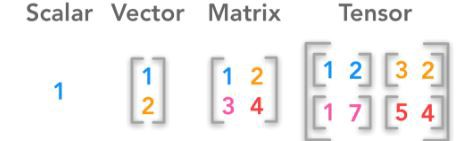

In [ ]:
car_1 = df.iloc[:, 2:4].to_numpy()[5]
car_1.shape

(2,)

In [ ]:
A.shape

(3, 2)

## Section 1.5 Tensors

Multidimensional arrays are called tensors. Scalars, vectors, and matrices are all tensors with different dimensions.

For a better understanding of how tensors can be used, we would have a multi dimension tensor if we categorized cars by company name and then had information about cars.

In [ ]:
df['Company'] = df['CarName'].str[:3]

In [ ]:
df_t = df.set_index(['Company'])

In [ ]:
df_t.loc['toy', ['carlength', 'enginesize']].head(2)

carlength  enginesize
Company                       
toy          158.7          92
toy          158.7          92

In [ ]:
# import torch

# target = torch.tensor(df['Targets'].values)
# features = torch.tensor(df.drop('Targets', axis = 1).values)

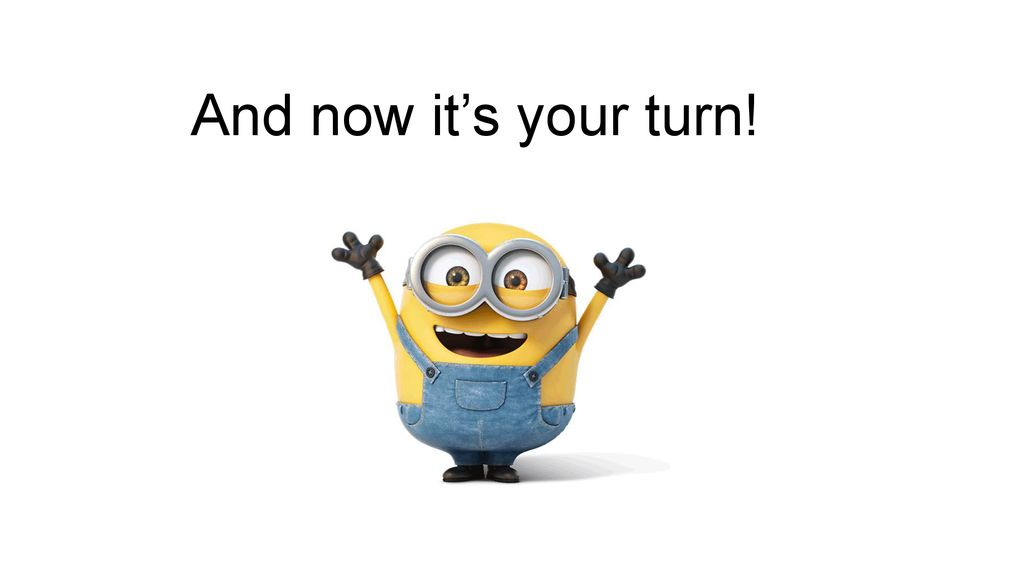

# Section 2 Operations and Manipulations on Matrices


In this tutorial, we focus on 7 different manipulation operators for matrices:

- **Addition**


## Section 2.1 Addition

Adding matrices is similar to adding vectors by adding components with the same index. 


With Numpy, the addition of matrices is done simply by using the $+$ operator, like with scalars:

In [ ]:
A = np.array([[2, 7],
              [3, 4],
              [8, 2]])

B = np.array([[3, 1],
              [4, 5],
              [7, 6]])

A + B

array([[ 5,  8],
       [ 7,  9],
       [15,  8]])

In [ ]:
(A + B).shape

(3, 2)

In [ ]:
A.shape

(3, 2)

## Section 2.2 Scalar Multiplication

There is also scalar multiplication, which refers to
multiplying a matrix by a scalar. In this case, each entry is multiplied
by this scalar:


$$
c\mathbf{A} = c
\begin{bmatrix}
\mathbf{A}_{1,1} & \mathbf{A}_{1,2} \\\\
\mathbf{A}_{2,1} & \mathbf{A}_{2,2} \\\\
\mathbf{A}_{3,1} & \mathbf{A}_{3,2}
\end{bmatrix}
= \begin{bmatrix} 
c \cdot \mathbf{A}_{1,1} & c \cdot \mathbf{A}_{1,2} \\\\
c \cdot \mathbf{A}_{2,1} & c \cdot \mathbf{A}_{2,2} \\\\
c \cdot \mathbf{A}_{3,1} & c \cdot \mathbf{A}_{3,2}
\end{bmatrix}
$$


For example multiply $A$ by $2$:

$$
\mathbf{A} = 
\begin{bmatrix}
4 & 0 \\\\
1 & -9 \
\end{bmatrix}
$$

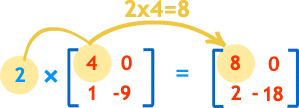

In [ ]:
A = np.array([[4, 0],
              [1, -9]])


2 * A

array([[  8,   0],
       [  2, -18]])

## Section 2.3 Transposition

Transposition is a core manipulation in data science and machine learning. Allows you to swap the rows and columns of a matrix. For example, if your dataset is built with observations as rows, but you want to use a machine learning framework where the observations should be columns, you need to transpose it.

There are two dimension in DataFrame, so in data science and linear algebra, vector can be defined based on these dimensions as column vector or row vector. You can distinguish vectors according to their shape. Numbers are
organized as a column in *column vectors*, as in the following vector
$\mathbf{u}$ :

$$
\mathbf{u} = \begin{bmatrix}
2 \\\\
1
\end{bmatrix}
$$

They are organized as a row in *row vectors*, as in the following vector
$\mathbf{v}$:

$$
\mathbf{v} = \begin{bmatrix}
2 & 1
\end{bmatrix}
$$




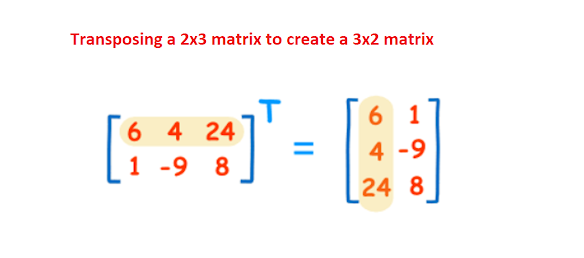

The transpose of a matrix is a new matrix whose rows are the columns of the original. It is possible to transpose a Numpy vector with the $T$ attribute of arrays only if its number of dimension is larger than one.


In [ ]:
A = np.array([[6, 4, 24],
              [1, -9, 8]])
A.T

array([[ 6,  1],
       [ 4, -9],
       [24,  8]])

In [ ]:
A.shape

(2, 3)

In [ ]:
A.T.shape

(3, 2)

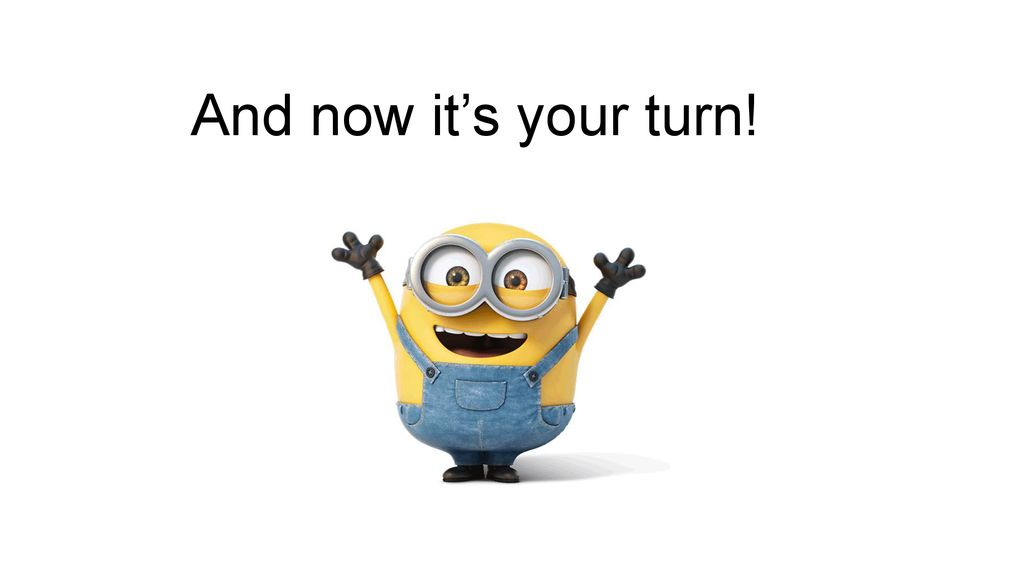

## Section 2.4 Matrix Product

Matrix product or matrix multiplication is based on dot product in vectors. It takes two matrices and returns another matrix. We can categorize Matrix product into two cases:

- **Matrices with vectors**

- **Matrices Product**

### Section 2.4.1 Matrices with vectors

A vector can be considered as a set of weights that are applied to each column in the matrix. So in this case each column of the matrix $A$ is weighted by values in the vector w.
$$
\mathbf{A} = 
\begin{bmatrix}
1 & 2 \\\\
5 & 6 \\\\
7 & 8 \
\end{bmatrix}
$$.
$$
\mathbf{w} = \begin{bmatrix}
3 \\\\
4
\end{bmatrix}
$$

![images](https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/images/matrix_vector_dot_product_weights.png)

In [ ]:
A = np.array([
    [1, 2],
    [5, 6],
    [7, 8]
])
w = np.array([3, 4])
A @ w

array([11, 39, 53])

In [ ]:
A = np.array([
    [1, 2],
    [5, 6],
    [7, 8]
])
w = np.array([3, 4]).reshape(-1, 1)
A @ w

array([[11],
       [39],
       [53]])

In [ ]:
np.array([3, 4]).reshape(-1, 1).shape

(2, 1)

In [ ]:
np.array([3, 4]).shape

(2,)

Let's check one application of Matrices with vectors dot product

In [ ]:
df_advertising = pd.read_csv('https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/df_advertising.csv')
df_advertising = df_advertising[['Radio', 'Newspaper', 'Sales']]
df_advertising.head()

Radio  Newspaper  Sales
0   37.8       69.2   22.1
1   39.3       45.1   10.4
2   45.9       69.3    9.3
3   41.3       58.5   18.5
4   10.8       58.4   12.9

In [ ]:
df_advertising.shape

(200, 3)

Let's say:

 **𝑆𝑎𝑙𝑒𝑠 = 𝑊1 * 𝑅𝑎𝑑𝑖𝑜 + 𝑊2 * 𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟**


$$
\mathbf{W} = \begin{bmatrix}
0.58 \\\\
0.23
\end{bmatrix}
$$


So by Matrix Poduct (Matrices with vectors), we can predict sales!



In [ ]:
W1 = 0.58
W2 = 0.23

w = np.array([
    [W1],
    [W2]
])

w

array([[0.58],
       [0.23]])

In [ ]:
w.shape

(2, 1)

In [ ]:
A = df_advertising.loc[:, ['Radio', 'Newspaper']].to_numpy()

In [ ]:
A.shape

(200, 2)

In [ ]:
A @ w

array([[37.84 ],
       [33.167],
       [42.561],
       ...,
       [ 6.866],
       [39.586],
       [ 6.989]])

In [ ]:
(A @ w).shape

(200, 1)

### Section 2.5.2 Matrices Product

Matrices Product is the equivalent of the dot product operation for two matrices. In this case, you are applying the matrix-vector product to each column of the second matrix, as you can see in the screenshot.

![images](https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/images/matrices_dot_product.png)

In [ ]:
A = np.array([
    [1, 2],
    [5, 6],
    [7, 8],
])
B = np.array([
    [3, 9],
    [4, 0]
])

A @ B

array([[11,  9],
       [39, 45],
       [53, 63]])

Let's check one application of Matrices dot product as Covariance Matrix

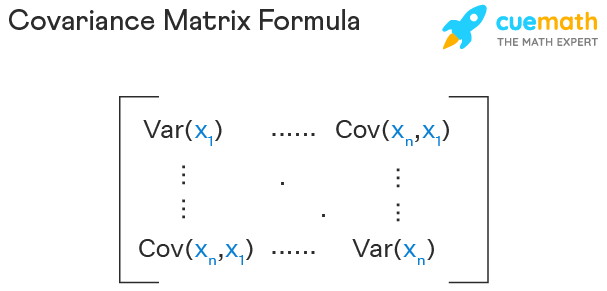

![](https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/images/Covariance_Matrix.png)

In [2]:
Math = np.array([92, 60, 100])
Science = np.array([80, 30, 70])

# Step 1: Calculate Variance for all variables

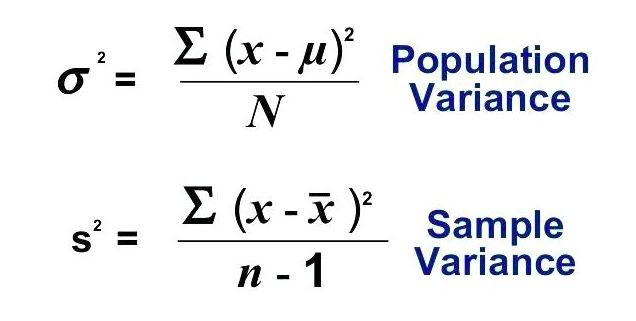

In [3]:
N = 3
np.sum(np.square(Math - Math.mean(axis=0)))/(N)

298.6666666666667

In [4]:
np.var(Math, axis=0)

298.6666666666667

# Step 2: Choose a pair of variables (Math and Science).

![images](https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/images/cov_known_unknown.jpeg)


## 2.a: Subtract the mean of the first variable (Math) from all observations

In [5]:
A_math = Math - Math.mean()
A_math

array([  8., -24.,  16.])

## 2.b: Subtract the mean of the second variable (Science) from all observations

In [6]:
B_science = Science - Science.mean()
B_science

array([ 20., -30.,  10.])

## 2.c: Multiply the corresponding observations

In [7]:
(A_math @ B_science)/(N-1)

520.0

# 3. For each unique pair of variables, repeat step 2

## We can use Matrices Product instead of repeating this process and all steps


In [10]:
Matrix_AB = np.array([Math - Math.mean(), Science - Science.mean()])

In [11]:
(Matrix_AB @ Matrix_AB.T)/(N-1)

array([[448., 520.],
       [520., 700.]])

In [9]:
np.cov(A_math, B_science)

array([[448., 520.],
       [520., 700.]])

In [ ]:
Matrix_AB.shape

(2, 3)

In [ ]:
Matrix_AB

array([[  8., -24.,  16.],
       [ 20., -30.,  10.]])

In [ ]:
Matrix_AB.T

array([[  8.,  20.],
       [-24., -30.],
       [ 16.,  10.]])

[Why is Linear Algebra so important in Machine Learning?](https://python.plainenglish.io/covariance-calculation-using-python-45b6a8e5df9f)

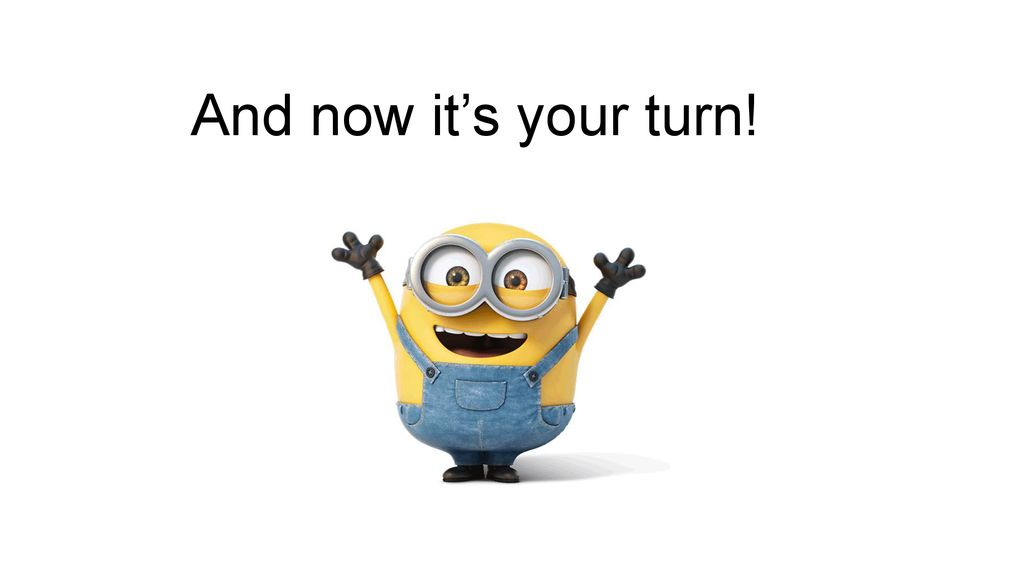

## Section 2.5 Inverse of a Matrix

<!-- ![](https://slidetodoc.com/presentation_image/2525289f4338deac1c8027216f3fe93a/image-7.jpg) -->

Functionality of the inverse of a matrix is as same as divide (We do not have divide by a matrix instead of it we multiply by inverse of a matrix!).

\begin{align}
        \text{Matrix: } & \left. A  \right. \\[1em]
        \text{Inverse of the Matrix: } & A^{-1} = \frac{1}{A}
    \end{align}

### Calculate inverse of a Matrix


\begin{align}
        A = \begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
    \end{align}





![](https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/images/Inverse_of_matrix.jpeg)

Let's try an example:


\begin{align}
        A = \begin{bmatrix}
4 & 7 \\
2 & 6 
\end{bmatrix}
    \end{align}


\begin{align}
        \ A^{-1} = \frac{1}{4*6-7*2}
        \begin{bmatrix}
6 & -7 \\
-2 & 4 
\end{bmatrix}
        \ = \frac{1}{10}
        \begin{bmatrix}
6 & -7 \\
-2 & 4 
\end{bmatrix}
        \ = 
        \begin{bmatrix}
0.6 & -0.7 \\
-0.2 & 0.4 
\end{bmatrix}
    \end{align}


    

In [ ]:
import numpy as np

A = np.array([[4, 7],
              [2, 6]])


A_inv = (1/(4*6-7*2))*np.array([[6, -7],[-2, 4]])
A_inv

In [ ]:
#Also you can use numpy 

A_inv = np.linalg.inv(A)

print(A_inv) 

**Example of Matrices to solve systems of equations**

A group of families took a trip on a bus, at 30 DKK per child and 32 DKK per adult for a total of 1184 DKK.

They took a train back at 35 DKK per child and 36 DKK per adult for a total of 1352 DKK.

How many children, and how many adults are in the group?



\begin{align}
        \begin{bmatrix}
          Bus_{Childprice} & Bus_{Adultprice} \\
          Train_{Childprice} & Train_{Adultprice} 
        \end{bmatrix}
\begin{bmatrix}
  Childs \\
  Adults 
\end{bmatrix}
\ =
        \begin{bmatrix}
          Bus_{Totalprice} \\
          Train_{Totalprice} 
        \end{bmatrix}
\end{align}



    

$$A \cdot \vec{x}=\vec{B}$$
$$A^{-1} \cdot A \vec{x}=A^{-1} \cdot \vec{B}$$
$$\vec{x}=A^{-1} \cdot \vec{B}$$

In [ ]:

A = np.array([[30, 32],
              [35, 36]])
B = np.array([[1184, 1352]])
B = B.reshape(-1,1)

X = np.linalg.inv(A) @ B
X

array([[16.],
       [22.]])

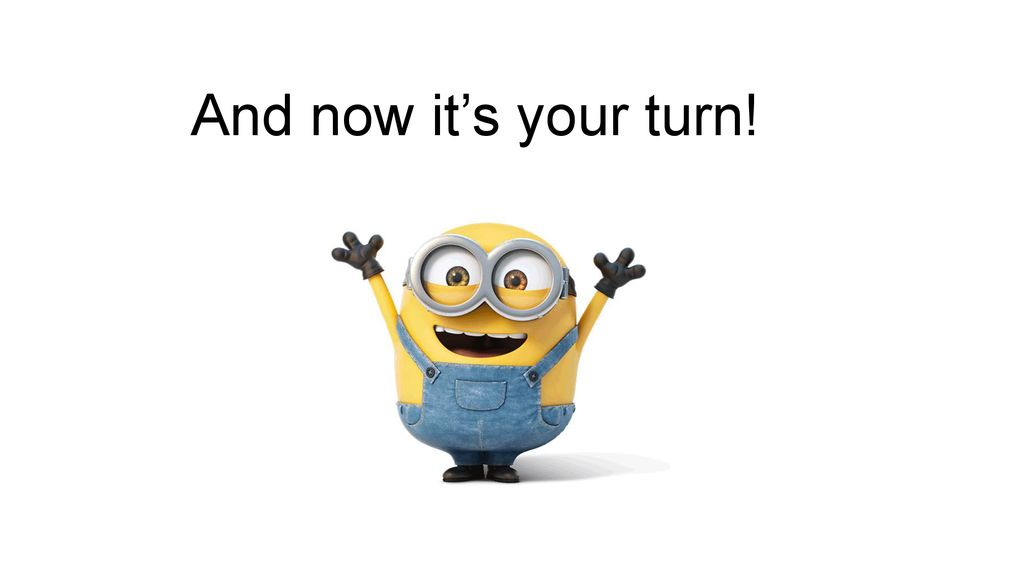

## Section 2.6 Matrix Determinant

A matrix is an array of many numbers. For a square matrix, i.e., a matrix with the same number of rows and columns, one can capture important information about the matrix in a just single number, called the determinant.

For example dererminant of matrix A is (|A|):

\begin{align}
        A = \begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
    \end{align}

![](https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/images/Determinant.png)


Let's try an example:


\begin{align}
        A = \begin{bmatrix}
4 & 7 \\
2 & 6 
\end{bmatrix}
    \end{align}


\begin{align}
        \ |A| = (4 * 6 ) - (7 * 2) = 24 - 14 = 10
    \end{align}


In [ ]:
A = np.array([[4, 7],
              [2, 6]])

In [ ]:
np.linalg.det(A)

## Section 2.7 Eigenvalues & Eigenvectors


- Matrix decomposition, also called matrix factorization is the process of splitting a matrix into multiple pieces. As an example, in data science, it can be used to reduce dimensionality without losing much information by selecting parts of the data.

- One way to understand it is to consider it as a special change of basis. You’ll first learn about eigenvectors and eigenvalues and then you’ll see the concept of change of basis. The main idea is to consider the eigendecomposition of a matrix  𝑨 as a change of basis where the new basis vectors are the eigenvectors.



![](https://www.visiondummy.com/wp-content/uploads/2014/03/eigenvectors.png)

**The Mathematics of Eigenvector and Eigenvalue**


For a square matrix A, an Eigenvector and Eigenvalue make this equation true:

![](https://www.mathsisfun.com/algebra/images/eigenvalue.svg)

Next we put in an identity matrix so we are dealing with matrix-vs-matrix:

\begin{align}
        I = \begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}
    \end{align}

\begin{align}
Av = λIv 
\end{align}


Bring all to left hand side:

\begin{align}
Av − λIv = 0
\end{align}

If v is non-zero then we can (hopefully) solve for λ using just the determinant:

\begin{align}
| A − λI | = 0
\end{align}

In a square matrix A, the eigenvectors are vectors that multiply by A but do not change direction.

In [ ]:
A = np.array([
    [1.2, 0.9],
    [0, -0.4]
])

In [ ]:
import numpy as np

v = np.array([-0.4902, 0.8715])
# v = np.array([-0.57, 0.2415])

y = A @ v
plt.quiver(0, 0, v[0], v[1], color="#2EBCE7", angles='xy',
           scale_units='xy', scale=1)
plt.quiver(0, 0, y[0], y[1], color="#00E64E", angles='xy',
           scale_units='xy', scale=1)
# [...] Add axes, styles, vector names

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.text(-0.5, 0.2, r'$\vec{v}$', color="#2EBCE7", size=18)
plt.text(0.3, -0.5, r'$\vec{y}$', color="#00E64E", size=18)

# draw axes
plt.axhline(0, c='#A9A9A9')
plt.axvline(0, c='#A9A9A9')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

In [ ]:
import IPython
iframe = '<iframe src="https://textbooks.math.gatech.edu/ila/eigenvectors.html" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)

Let's check Eigenvector in This case:

For instance we have A and x (as vector):


\begin{align}
y = Ax ====>
y = \begin{bmatrix}
2 & 0 \\
0 & 0.5 
\end{bmatrix}
        \begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
\end{align}

The matrix A can be basis vectors, so in this case, we want to stretch the x-axis twice and contract the y-axis twice.

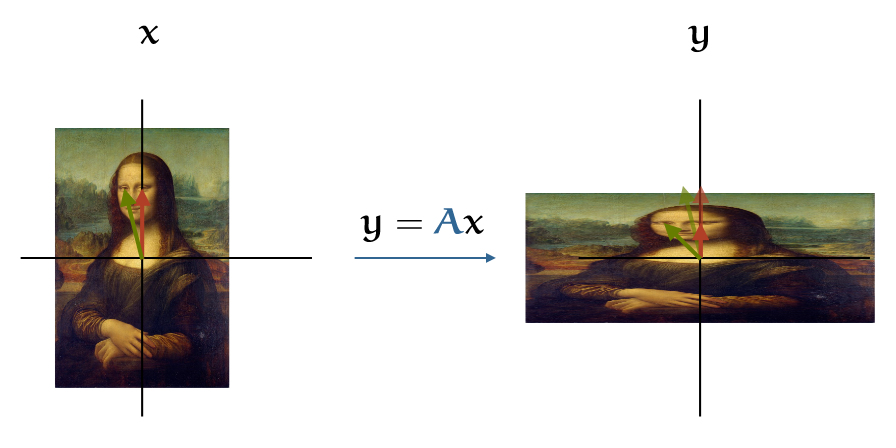

In this image we’ve also drawn two vectors: 
- One to the middle of Mona Lisa’s left eye
- one to middle of the right

**Red vectors** shrink without changing direction. **Green vector** is affected by both the squashing and the stretching so its direction and magnitude both change. 

Hence, the red vector is an eigenvector, and the green vector isn’t.

**Example of Eigenvector and Eigenvalue**

Find the Eigenvector of matrix A for the Eigenvalue λ = 6:


\begin{align}
        A = \begin{bmatrix}
-6 & 3 \\
4 & 5 
\end{bmatrix}
    \end{align}

Put in the values we know:

\begin{align}
| A − λI | = 0 \\\
        det(\begin{bmatrix}
-6 & 3 \\
4 & 5 
\end{bmatrix}  - λ
        \begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix})
= det(        \begin{bmatrix}
-6-λ & 3 \\
4 & 5-λ 
\end{bmatrix}) = (-6-λ)(5-λ) - 12 = λ^2 - λ - 42 = 0
\end{align}


\begin{align}
| A − λI | =  λ^2 - λ - 42 = 0
\end{align}

In [ ]:
# roots of quadratic equation
import IPython
iframe_1 = '<iframe src="https://www.mathsisfun.com/quadratic-equation-solver.html" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe_1)

\begin{align}
λ = 6 \\\
λ = -7
\end{align}

In [ ]:
import IPython
iframe = '<iframe src="https://matrixcalc.org/vectors.html#eigenvectors(%7B%7B-6,3%7D,%7B4,5%7D%7D)" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)

Put in the values we know:

\begin{align}
Av = 6v ====>
        \begin{bmatrix}
-6 & 3 \\
4 & 5 
\end{bmatrix}
        \begin{bmatrix}
x \\
y
\end{bmatrix}
= 6
        \begin{bmatrix}
x \\
y
\end{bmatrix}
    \end{align}

After multiplying we get these two equations:

\begin{align}
-6x + 3y = 6x
\end{align}
\begin{align}
4x + 5y = 6y
    \end{align}

Bringing all to left hand side:

\begin{align}
-12x + 3y = 0
\end{align}
\begin{align}
4x - y = 0
    \end{align}

In [ ]:
import numpy as np
from numpy.linalg import eig

A = np.array([
    [-6, 3],
    [4, 5]
])

eigvals, eigvecs = np.linalg.eig(A)
u = eigvecs[:, 0].reshape(-1, 1)
v = eigvecs[:, 1].reshape(-1, 1)

print("eigvals: ", eigvals)
print("eigvecs_u: ", u)
print("eigvecs_v: ", v)

In [ ]:
-0.24253563 * 4

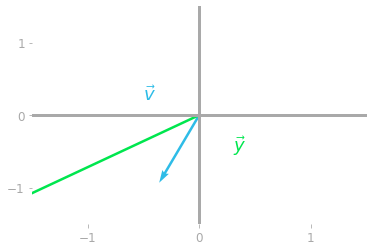

In [ ]:
import numpy as np

v = eigvecs[:, 1].reshape(-1, 1)


y = A @ v
plt.quiver(0, 0, v[0], v[1], color="#2EBCE7", angles='xy',
           scale_units='xy', scale=1)
plt.quiver(0, 0, y[0], y[1], color="#00E64E", angles='xy',
           scale_units='xy', scale=1)
# [...] Add axes, styles, vector names

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.text(-0.5, 0.2, r'$\vec{v}$', color="#2EBCE7", size=18)
plt.text(0.3, -0.5, r'$\vec{y}$', color="#00E64E", size=18)

# draw axes
plt.axhline(0, c='#A9A9A9')
plt.axvline(0, c='#A9A9A9')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

**What is the purpose of Eigenvector and Eigenvalue?**

One of the cool things is we can use matrices to do transformations in space, which is used a lot in computer graphics.

In that case the eigenvector is "the direction that doesn't change direction" !

And the eigenvalue is the scale of the stretch:

- 1 means no change,
- 2 means doubling in length,
- −1 means pointing backwards along the eigenvalue's direction
- etc

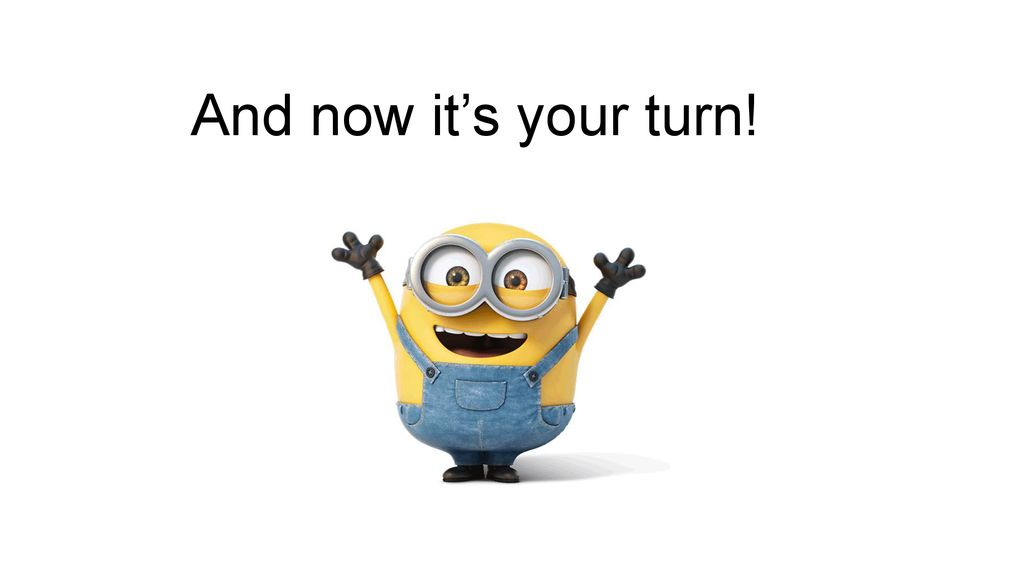

# Section 3 Principal Component Analysis

***Eigenvalues and Eigenvector*** have many uses! 

Let's check one application of Eihenvectors as PCA

Principal Component Analysis, or PCA, is an algorithm that you can use to reduce the dimensionality of a dataset. It is useful, for instance, to reduce computation time and compress data.



![](https://miro.medium.com/max/1200/1*Xzyp7AoyNNiTij8Mrqc3mQ.gif)

**Theoretical context**


PCA reduces the dimensionality of data while preserving as much information as possible.

**From scratch, a step-by-step guide to PCA**

**1. Check covariance Matrix:** Variables should be correlated

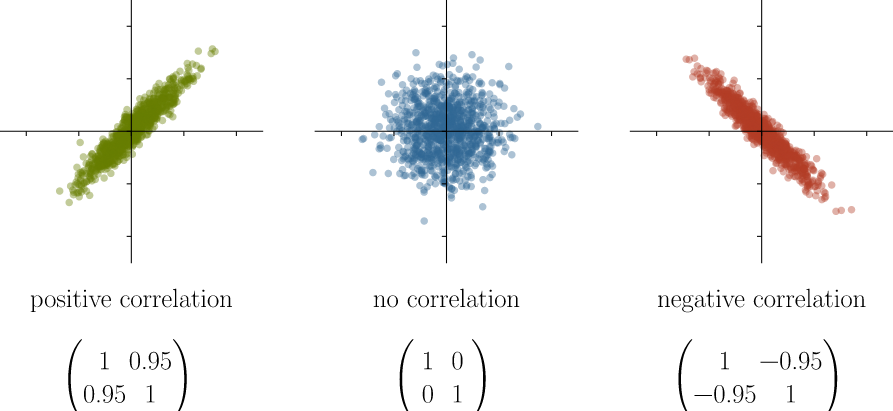

**2. Calcualte Eigenvectors and Eigenvalues**

**3. Select M (< Ds) Eigenvectors with highest Eigenvalues**

**4. Project data points to these Eigenvectors**

Here's a simple example to illustrate these steps, imagine we have data with these distributions for two variables:

\begin{align}
        x = \begin{bmatrix}
-4 & -3 & -2 & -1 & 0 & 1 & 2 & 3 & 4\
\end{bmatrix}
\\\ 
y = \begin{bmatrix}
-4.2 & -3.1 & -2.2 & -1.1 & 0 & 1.2 & 2.1 & 3.2 & 4.1\
\end{bmatrix}
    \end{align}

So based on data we have:

\begin{align}
y = x
\end{align}


**1. Check covariance Matrix:**

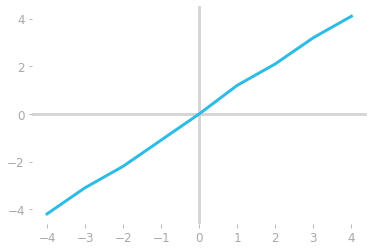

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
y = np.array([-4.2, -3.1, -2.2, -1.1, 0, 1.2, 2.1, 3.2, 4.1])

plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)
plt.plot(x, y)


plt.show()

In [ ]:
X = np.array([x, y]).T
X.shape

(9, 2)

In [ ]:
X

array([[-4. , -4.2],
       [-3. , -3.1],
       [-2. , -2.2],
       [-1. , -1.1],
       [ 0. ,  0. ],
       [ 1. ,  1.2],
       [ 2. ,  2.1],
       [ 3. ,  3.2],
       [ 4. ,  4.1]])

In [ ]:
# cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

covariance = np.cov(X, rowvar=False)
covariance

array([[7.5  , 7.875],
       [7.875, 8.275]])

**2. Calcualte Eigenvectors and Eigenvalues**

In [ ]:
eigvals, eigvecs = np.linalg.eig(covariance)
eigvals, eigvecs

(array([2.97203379e-03, 1.57720280e+01]), array([[-0.72427443, -0.68951183],
        [ 0.68951183, -0.72427443]]))

In [ ]:
u = eigvecs[:, 0].reshape(-1, 1)
v = eigvecs[:, 1].reshape(-1, 1)

In [ ]:
print(eigvals)

[2.97203379e-03 1.57720280e+01]


In [ ]:
v

array([[-0.68951183],
       [-0.72427443]])

In [ ]:
u

array([[-0.72427443],
       [ 0.68951183]])

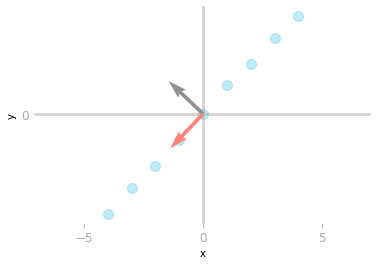

In [ ]:
X_centered = X - X.mean(axis=0)

# plt.quiver(0, 0,
#            2 * np.sqrt(eigvals[0]) * u[0], 2 * np.sqrt(eigvals[0]) * u[1],
#            color="#919191", angles='xy', scale_units='xy', scale=1,
#            zorder=2, width=0.011)
# plt.quiver(0, 0,
#            2 * np.sqrt(eigvals[1]) * v[0], 2 * np.sqrt(eigvals[1]) * v[1],
#            color="#FF8177", angles='xy', scale_units='xy', scale=1,
#            zorder=2, width=0.011)

plt.quiver(0, 0,
          2 * u[0],  2 * u[1],
           color="#919191", angles='xy', scale_units='xy', scale=1,
           zorder=2, width=0.011)
plt.quiver(0, 0,
           2 * v[0], 2 * v[1],
           color="#FF8177", angles='xy', scale_units='xy', scale=1,
           zorder=2, width=0.011)
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.3)
# [...] Add axes

# Assure that ticks are displayed with a specific step
# plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

plt.xlabel("x")
plt.ylabel("y")

# assure x and y axis have the same scale
plt.axis('equal')

plt.show()

**3. Select M (< Ds) Eigenvectors with highest Eigenvalues**

In [ ]:
sort_index = eigvals.argsort()[::-1]   

eigvals_sorted = eigvals[sort_index]
eigvecs_sorted = eigvecs[:, sort_index]
eigvecs_sorted

array([[-0.68951183, -0.72427443],
       [-0.72427443,  0.68951183]])

**4. Project data points to these Eigenvectors**

In [ ]:
X_transformed = X_centered @ eigvecs_sorted
X_transformed

array([[ 5.79999989e+00,  1.14803630e-03],
       [ 4.31378619e+00,  3.53366185e-02],
       [ 2.97242739e+00, -6.83771644e-02],
       [ 1.48621369e+00, -3.41885822e-02],
       [-7.14761016e-17,  6.80455026e-17],
       [-1.55864114e+00,  1.03139765e-01],
       [-2.89999994e+00, -5.74018150e-04],
       [-4.38621364e+00,  3.36145640e-02],
       [-5.72757244e+00, -7.00992188e-02]])

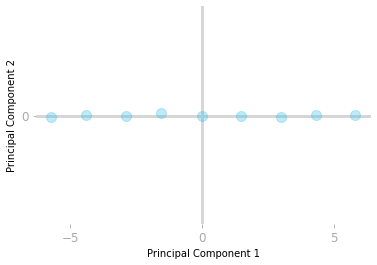

In [ ]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.3)
# [...] Add axes

# Assure that ticks are displayed with a specific step
# plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()



![](https://rishi-advani.com/random-projections/examples/kpca/pc.gif)

Using PCA, you can remove variables that don't have much variance!

## How big is the fish?

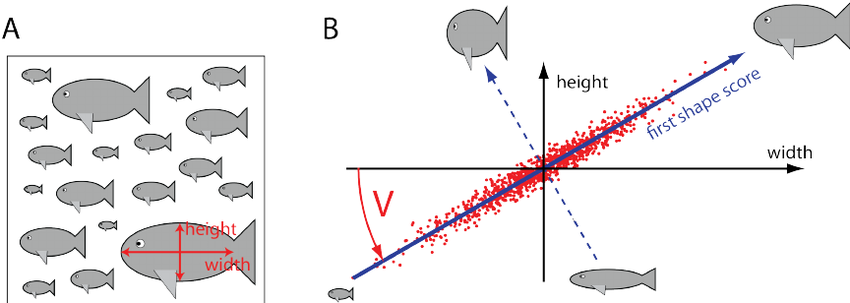

### Fish dataset description

    Species: Species name of fish
    Weight: Weight of fish in gram
    Length1: Vertical length in cm
    Length2: Diagonal length in cm
    Length3: Cross length in cm
    Height: Height in cm
    Width: Diagonal width in cm

In [ ]:
import seaborn as sns; sns.set()
import plotly.express as px

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Fish.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Fish 3d plot

In [ ]:
fig = px.scatter_3d(df,
                    x='Length2',
                    y='Width',
                    z='Height',
                    color='Species')
fig.show()

### Plan of exercise

1. Check covariance Matrix
2. Calcualte Eigenvectors and Eigenvalues
3. Select M (< Ds) Eigenvectors with highest Eigenvalues
4. Project data points to these Eigenvectors
  * Calculate center of the points: X-X.mean()
  * Calculate Dot product of X_centered by eigenvectors



Use plotly package for plotting

```fig = px.scatter(x=x, y=y, color=labels)```

```fig.show()```

### Two principal components

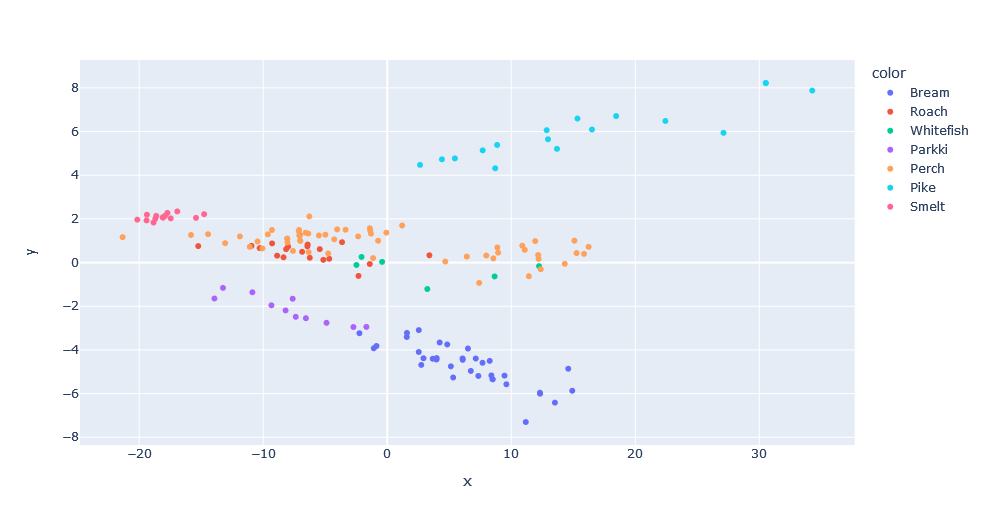

### One Principal component

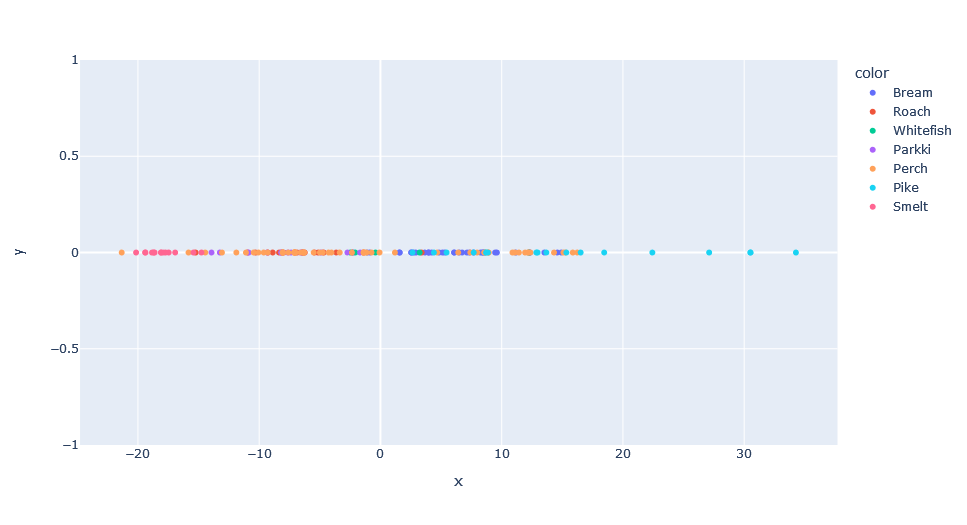

Pike

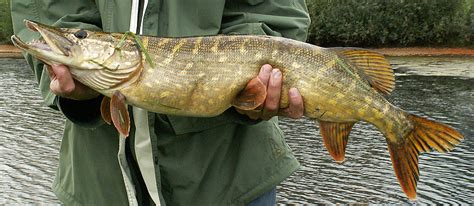

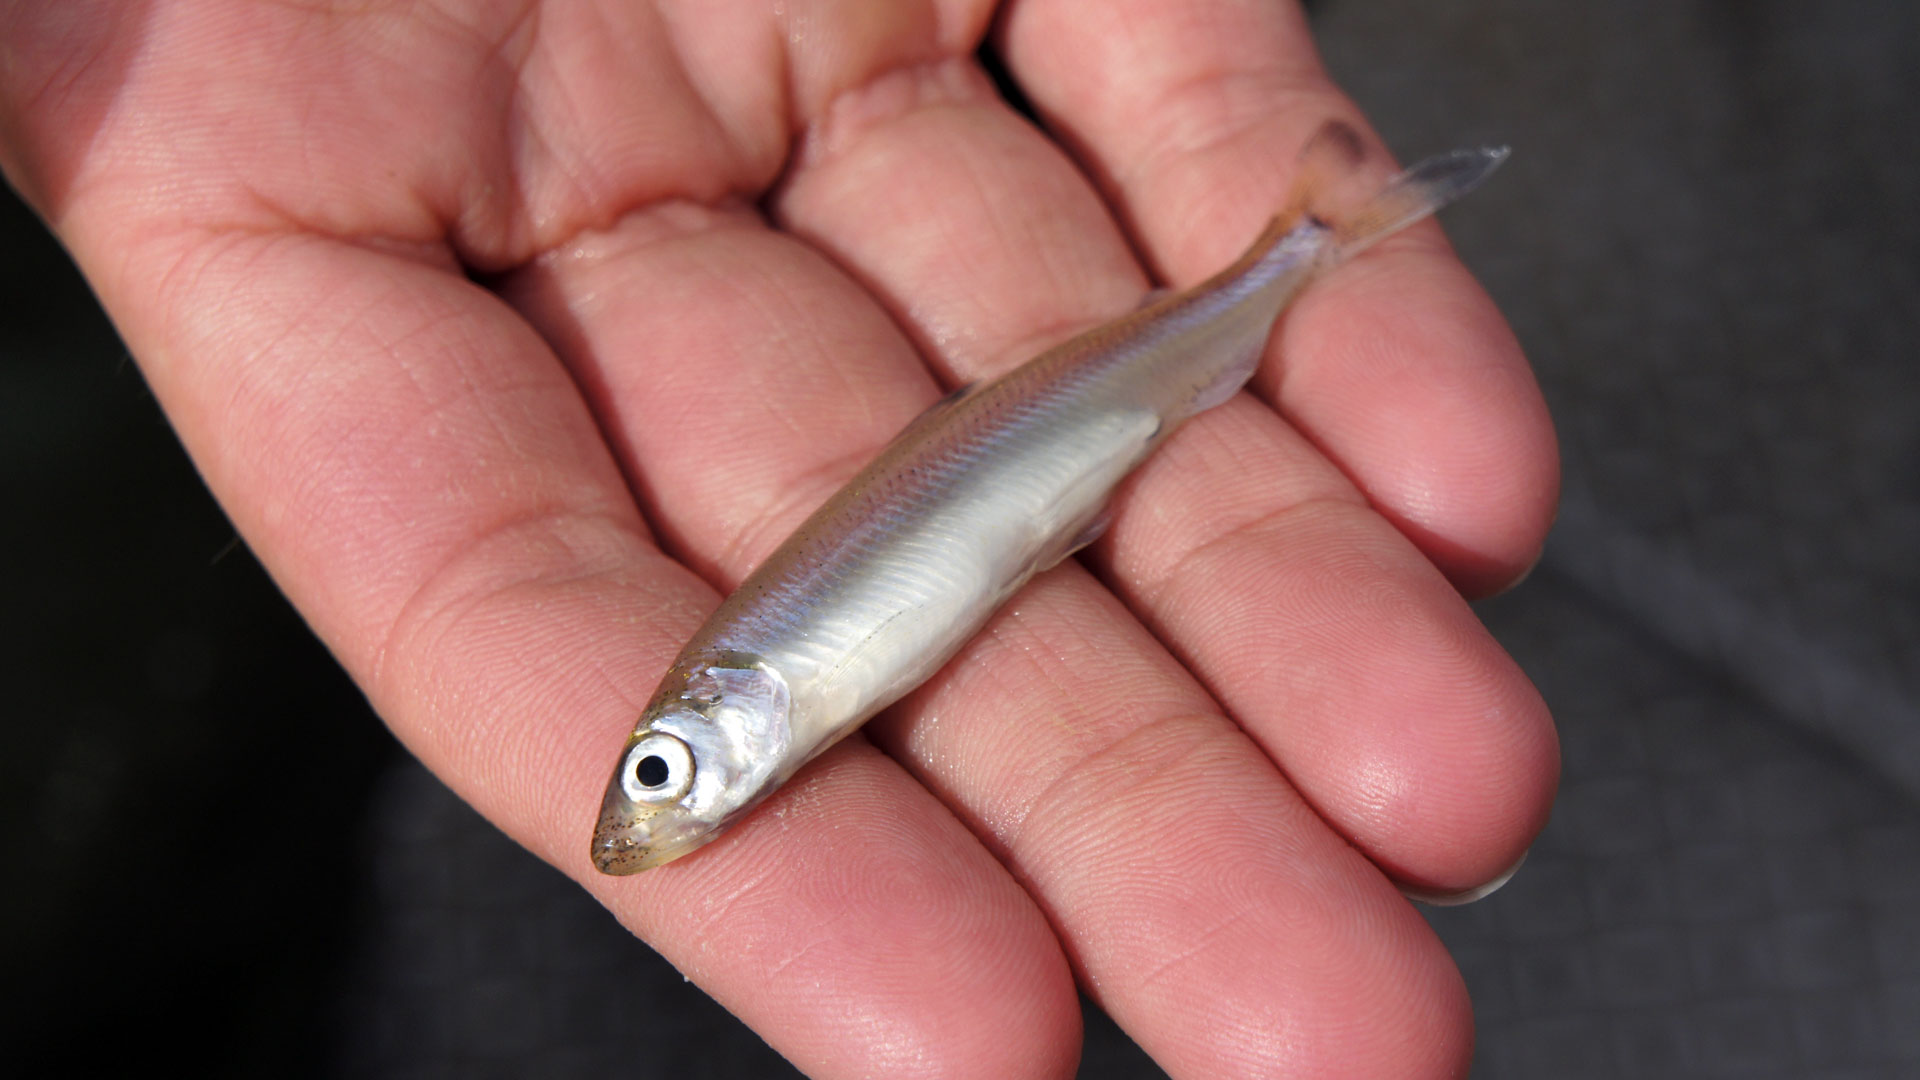

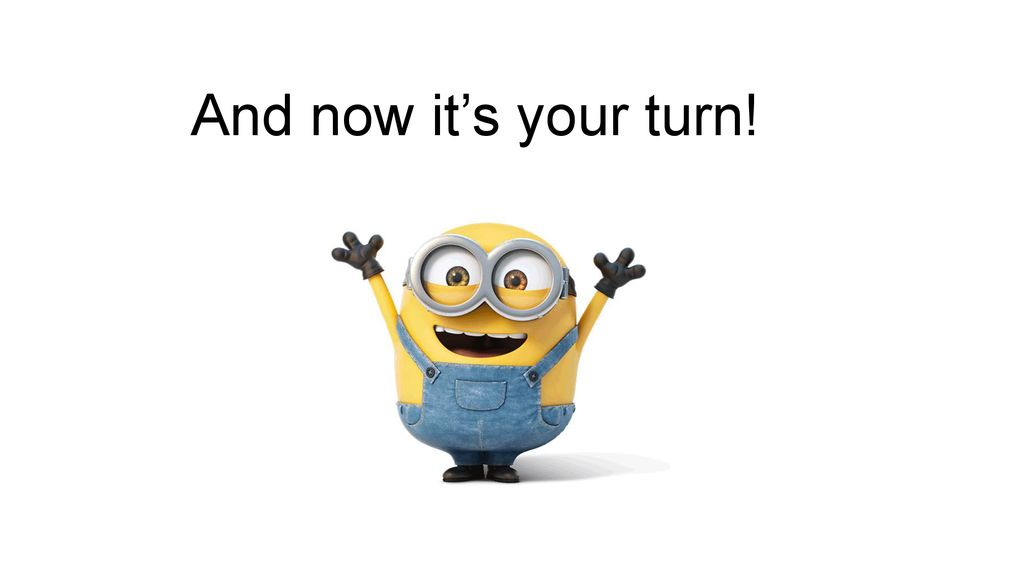

# Section 4 Hands-On Project: Principal Component Analysis

In [ ]:
df_advertising = pd.read_csv('https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/df_advertising.csv')
df_advertising = df_advertising[['Radio', 'Newspaper', 'Sales']]
df_advertising.head()

Radio  Newspaper  Sales
0   37.8       69.2   22.1
1   39.3       45.1   10.4
2   45.9       69.3    9.3
3   41.3       58.5   18.5
4   10.8       58.4   12.9

In [ ]:
X = df_advertising[['Radio', 'Newspaper']].to_numpy()

In [ ]:
X[:, 0]

array([37.8, 39.3, 45.9, ...,  9.3, 42. ,  8.6])

**1. Check covariance Matrix:**

In [ ]:
# cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

covariance = np.cov(X, rowvar=False)
covariance

array([[220.42774271, 114.49697889],
       [114.49697889, 474.30832563]])

**2. Calcualte Eigenvectors and Eigenvalues**

In [ ]:
eigvals, eigvecs = np.linalg.eig(covariance)
eigvals, eigvecs

(array([176.41951627, 518.31655207]), array([[-0.933425 , -0.3587726],
        [ 0.3587726, -0.933425 ]]))

In [ ]:
u = eigvecs[:, 0].reshape(-1, 1)
v = eigvecs[:, 1].reshape(-1, 1)
# z = eigvecs[:, 2].reshape(-1, 1)

In [ ]:
print(eigvals)

[176.41951627 518.31655207]


In [ ]:
v

array([[-0.3587726],
       [-0.933425 ]])

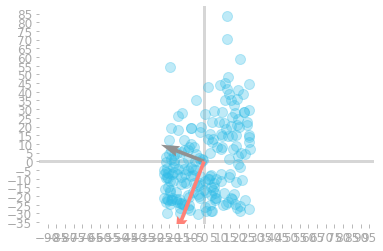

In [ ]:
X_centered = X - X.mean(axis=0)

plt.quiver(0, 0,
           2 * np.sqrt(eigvals[0]) * u[0], 2 * np.sqrt(eigvals[0]) * u[1],
           color="#919191", angles='xy', scale_units='xy', scale=1,
           zorder=2, width=0.011)
plt.quiver(0, 0,
           2 * np.sqrt(eigvals[1]) * v[0], 2 * np.sqrt(eigvals[1]) * v[1],
           color="#FF8177", angles='xy', scale_units='xy', scale=1,
           zorder=2, width=0.011)

plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.3)
# [...] Add axes

# Assure that ticks are displayed with a specific step
# plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

plt.xlabel("")
plt.ylabel("")

# assure x and y axis have the same scale
plt.axis('equal')

plt.show()



**3. Select M (< Ds) Eigenvectors with highest Eigenvalues**

In [ ]:
sort_index = eigvals.argsort()[::-1]   

eigvals_sorted = eigvals[sort_index]
eigvecs_sorted = eigvecs[:, sort_index]
eigvecs_sorted

array([[-0.3587726, -0.933425 ],
       [-0.933425 ,  0.3587726]])

**4. Project data points to these Eigenvectors**

In [ ]:
X_transformed = X_centered @ eigvecs_sorted
X_transformed

array([[-41.28826088,   0.29686008],
       [-19.33087737,  -9.74969702],
       [-44.28766142,  -7.22800512],
       ...,
       [ 27.55584791,   4.36855331],
       [-39.9948308 ,  -4.69984269],
       [ 25.66011124,   5.84712778]])

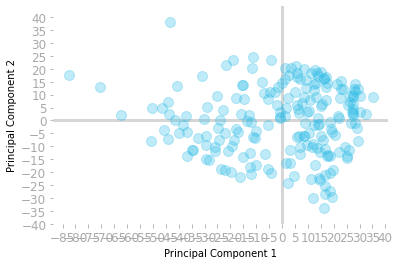

In [ ]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.3)
# [...] Add axes

# Assure that ticks are displayed with a specific step
# plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()



# Summary

In this tutorial, we specifically focused on:



*   Properties of a matrix, such as inverse and rank
*   Matrices to solve systems of equations
*   What eigenvalues/eigenvectors are and why they might be useful



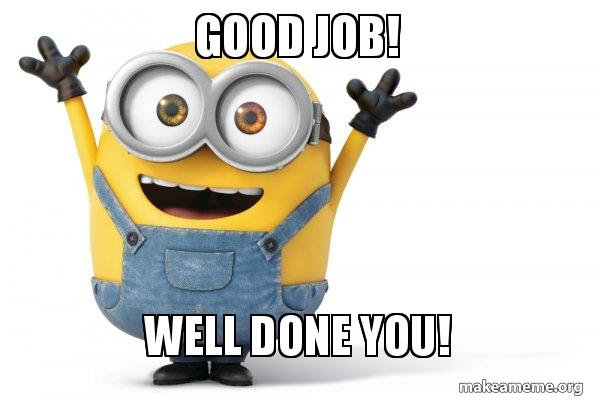